## Lectura de las bases

In [416]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.compose import ColumnTransformer
from sklearn.linear_model  import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

In [395]:
datos = pd.read_excel(".\\EarlyRetirementPrediction.xlsx")
datos.head()

,Retire Before 65 Years Old,Gender,Desease,Education Level,Marital Status,Monthly Income,Employee/Employer,Dependants,Unemployment Rate,Stock Market,Credit Score,Government Bonds Return
0,1,1,1,3,0,18000,0,4,3.444876,24066.16667,699,7.715833
1,0,1,0,3,0,32000,0,1,5.023797,42063.16667,639,5.414833
2,0,1,1,4,0,20000,0,2,5.355220,30100.50000,610,7.962750
3,0,0,1,4,1,35000,1,1,3.843570,24066.16667,649,7.715833
4,0,0,1,3,0,27000,0,1,4.949226,19439.00000,638,8.024167


No se tiene una base de datos debalanceada

<AxesSubplot:xlabel='Dependants', ylabel='count'>

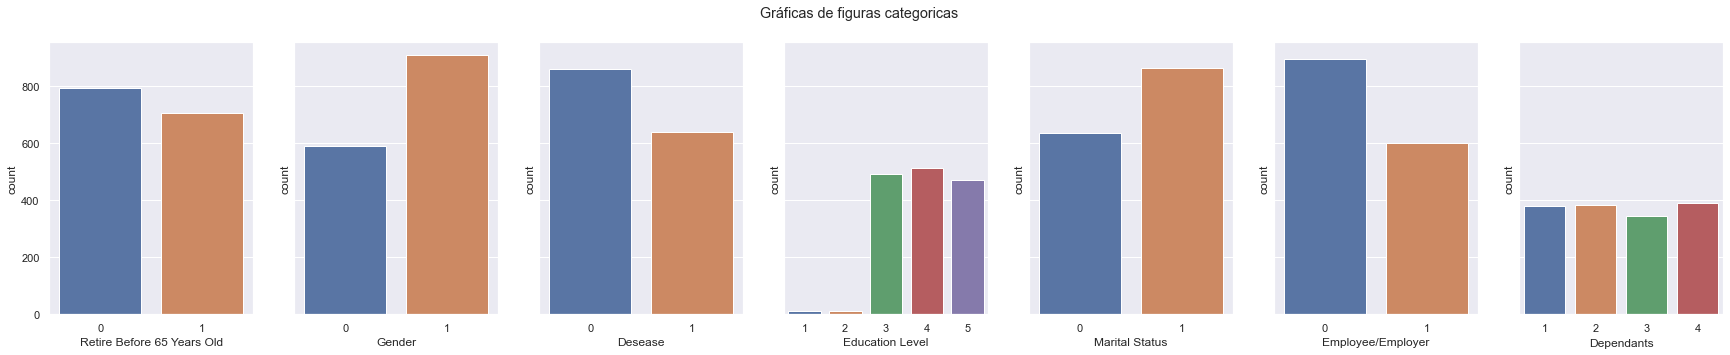

In [396]:
### Variables binarias countplot

figs, axs = plt.subplots(1,7,figsize = (30,5),sharey=True)

figs.suptitle('Gráficas de figuras categoricas')
sns.countplot(ax=axs[0],data= datos,x ="Retire Before 65 Years Old")
sns.countplot(ax=axs[1],data= datos,x ="Gender")
sns.countplot(ax= axs[2],data = datos, x= "Desease")
sns.countplot(ax= axs[3],data= datos, x='Education Level')
sns.countplot(ax=axs[4], data = datos, x='Marital Status')
sns.countplot(ax= axs[5], data= datos, x="Employee/Employer")
sns.countplot(ax=axs[6], data = datos, x = "Dependants")



<AxesSubplot:xlabel='Government Bonds Return', ylabel='Count'>

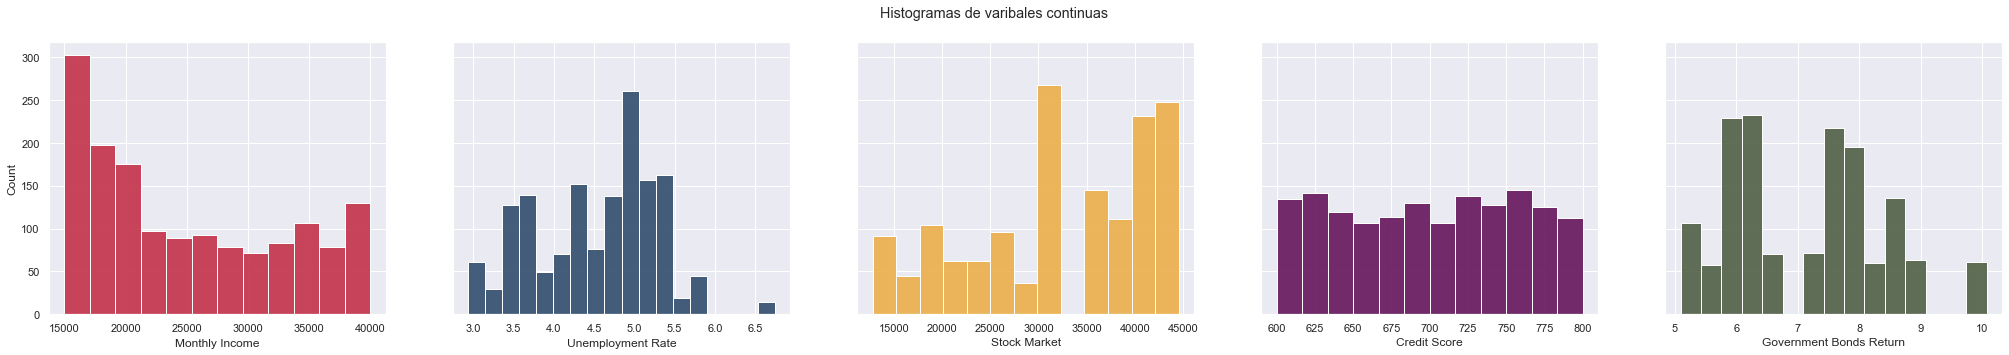

In [397]:
figs, axs = plt.subplots(1,5,figsize = (35,5), sharey= True)
figs.suptitle('Histogramas de varibales continuas')
sns.histplot(data = datos, x = 'Monthly Income',ax = axs[0],alpha=.9,color = "#C33149")
sns.histplot(data = datos, x = 'Unemployment Rate', ax = axs[1],color = "#304D6D", alpha = .9)
sns.histplot(data = datos, x = 'Stock Market', ax = axs[2],color = "#EDAE49", alpha = .9)
sns.histplot(data = datos, x = 'Credit Score', ax = axs[3],color = "#66155B", alpha = .9)
sns.histplot(data = datos, x = 'Government Bonds Return', ax = axs[4], color = '#515F45', alpha = .9)

## Separacion en X y Y


In [398]:
y = datos['Retire Before 65 Years Old']
X = datos.drop('Retire Before 65 Years Old', axis = 1)



## Separación en test y entrenamiento

In [399]:
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state=50)


In [400]:
Tuberia = Pipeline([('Escalar', StandardScaler()), 
                    ('Logistic', LogisticRegression())])

In [401]:
Tuberia.fit(X_train,y_train)

Pipeline(steps=[('Escalar', StandardScaler()),
                ('Logistic', LogisticRegression())])

In [402]:
prediccion =Tuberia.predict(X_test)

In [403]:
prediccion_p = Tuberia.predict_proba(X_test)

In [404]:
prediccion_DF = pd.DataFrame(prediccion,columns= ['Retire Before 65 Years Old Prediction'])
prediccion_p_DF = pd.DataFrame(prediccion_p, columns = ['Prob of No Retirement', 'Prob of Retirement'])

In [405]:
Predicciones = pd.concat([prediccion_DF, prediccion_p_DF], axis = 1)

In [406]:
matriz_confusion = confusion_matrix(y_test,prediccion)

In [407]:
print(classification_report(y_test, prediccion, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       243
           1       0.85      0.79      0.82       257

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.82      0.82      0.82       500



Text(0.5, 1.0, 'Matriz de Confusión - Regresión Logistica')

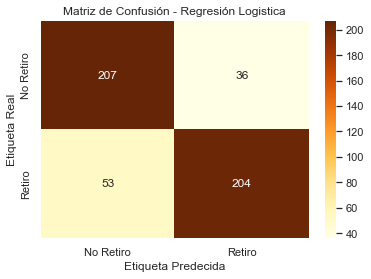

In [408]:
sns.heatmap(matriz_confusion,annot=True, cmap="YlOrBr", fmt="d", 
            xticklabels = ['No Retiro', 'Retiro'], 
            yticklabels = ['No Retiro', 'Retiro'])
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predecida')
plt.title("Matriz de Confusión - Regresión Logistica")

In [409]:
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop = True, inplace = True)
Test = pd.concat([X_test, y_test, Predicciones ], axis = 1)

In [410]:
Test.to_csv('.\\Test.csv')

In [417]:
odds = np.exp(Tuberia[1].coef_[0])

In [418]:
X.columns

Index(['Gender', 'Desease', 'Education Level', 'Marital Status',
       'Monthly Income', 'Employee/Employer', 'Dependants',
       'Unemployment Rate', 'Stock Market', 'Credit Score',
       'Government Bonds Return'],
      dtype='object')

In [421]:
pd.DataFrame(odds, X.columns,columns =['coef']).sort_values(by='coef',ascending=False)

,coef
Dependants,5.119606
Employee/Employer,1.457308
Gender,1.397844
Marital Status,1.274824
Government Bonds Return,1.102265
Stock Market,1.061081
Credit Score,0.950622
Education Level,0.851860
Unemployment Rate,0.833379
Desease,0.827792
